In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import export_graphviz,plot_tree


In [2]:
auto=pd.read_csv("https://raw.githubusercontent.com/DrSaadLa/PythonTuts/main/TreeBasedModels/auto_mpg.csv")

In [3]:
auto.loc[auto['horsepower']=='?', 'horsepower'] = np.nan
auto['horsepower'] = auto['horsepower'].astype('float')
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [4]:
auto.dropna(inplace=True)
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [5]:
auto['origin'] = auto['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
auto = pd.get_dummies(auto, columns = ['origin'], prefix = '', 
                      prefix_sep = '', drop_first=True)

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,Japan,USA
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,False,True


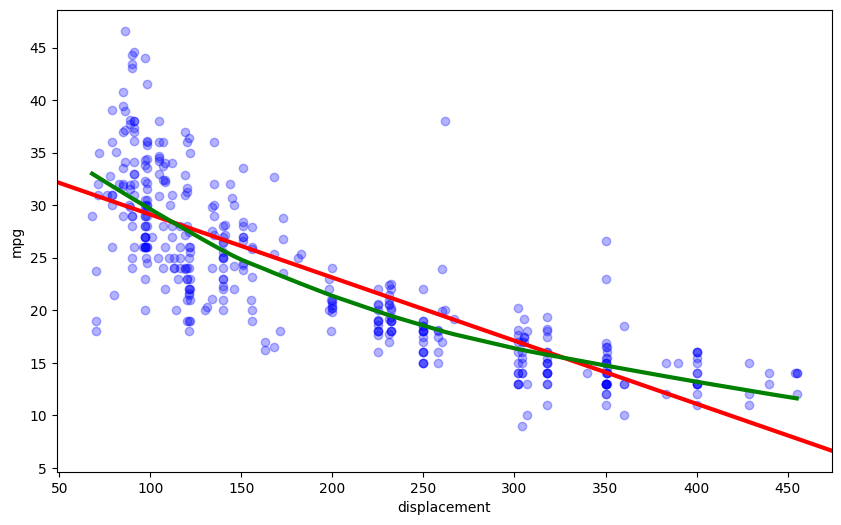

In [6]:
plt.figure(figsize=(10, 6))
sns.regplot(x = 'displacement', y = 'mpg', 
            data = auto,
            ci=None, 
            truncate=False,
            scatter_kws={"color": "blue", "alpha": 0.3}, 
            line_kws={"color": "red", "lw":3})

sns.regplot(x = 'displacement', y = 'mpg', 
            data = auto,
            ci=None, 
            scatter=False,
            truncate=False,
            lowess=True,
            line_kws={"color": "green", "lw":3})

plt.show()

In [7]:
X = auto.drop(['mpg', 'car name'], axis=1)
y = auto['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.20, 
                                                    random_state=3)

In [8]:
rt1 = DecisionTreeRegressor(random_state=1)
rt2 = DecisionTreeRegressor(random_state=1, max_depth=2)
rt8 =  DecisionTreeRegressor(random_state=1, max_depth=8)
rt1.fit(X_train, y_train)
rt2.fit(X_train, y_train)
rt8.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=1)

In [9]:
y_pred_train1 = rt1.predict(X_train)
y_pred_train2 = rt2.predict(X_train)
y_pred_train8 = rt8.predict(X_train)

In [10]:
mse1 = MSE(y_pred_train1, y_train)
mse2 = MSE(y_pred_train2, y_train)
mse8 = MSE(y_pred_train8, y_train)

In [11]:
train_rmse1 = np.sqrt(mse1)
train_rmse2 = np.sqrt(mse2)
train_rmse8 = np.sqrt(mse8)

In [12]:
print("Train set RMSE of rt1 without max depth",train_rmse1)
print("Train set RMSE of rt2 with max depth2 ",train_rmse2)
print("Train set RMSE of rt8 with max depth8 ",train_rmse8)

Train set RMSE of rt1 without max depth 0.0
Train set RMSE of rt2 with max depth2  4.083803120753489
Train set RMSE of rt8 with max depth8  0.9374359635570909


In [13]:
y_pred1 = rt1.predict(X_test)
y_pred2 = rt2.predict(X_test)
y_pred8 = rt8.predict(X_test)

In [14]:
test_mse1 = MSE(y_pred1, y_test)
test_mse2 = MSE(y_pred2, y_test)
test_mse8 = MSE(y_pred8, y_test)
test_rmse1 = np.sqrt(test_mse1)
test_rmse2 = np.sqrt(test_mse2)
test_rmse8 = np.sqrt(test_mse8)

In [15]:
print("Test set RMSE of rt1 without max depth",test_rmse1)
print("Test set RMSE of rt2 with max depth2 ",test_rmse2)
print("Test set RMSE of rt8 with max depth8 ",test_rmse8)

Test set RMSE of rt1 without max depth 3.2330766786648564
Test set RMSE of rt2 with max depth2  3.7835372433196044
Test set RMSE of rt8 with max depth8  3.0050427605909937


In [16]:
rt = DecisionTreeRegressor(max_depth=8,
               min_samples_leaf=0.10,
               random_state=3)
rt.fit(X_train, y_train)
preds = rt.predict(X_test)
rmse = np.sqrt(MSE(preds, y_test))

In [17]:
print("Test set RMSE",rmse)

Test set RMSE 3.141917837044161


In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
regtree=DecisionTreeRegressor()
param_grid={ "max_depth" : [1,3,5],
    "min_samples_leaf":np.arange(0.01, 0.15, 0.01),
    "max_features":["auto","log2"]}

In [20]:
mpg_tuning_model = GridSearchCV(
    regtree,param_grid=param_grid,
    scoring = 'neg_mean_squared_error', 
    cv= 5,
    verbose=1)

In [21]:
mpg_tuning_model.fit(X_train, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/conda/lib/python3.10/si

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14])},
             scoring='neg_mean_squared_error', verbose=1)

In [22]:
mpg_tuning_model.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features='log2', min_samples_leaf=0.03)

In [23]:
print("the best score",-mpg_tuning_model.best_score_)

the best score 11.732408304727086
